Carga remota del dataset desde la URL y descompresión del mismo.
Estoy en local de Windows, por lo tanto los comandos son la versión alternativa de cmd, salvo el wget que he decidio descargarme el exe y meterlo en system32.

In [1]:
#Descarga el dataset
!wget https://drive.upm.es/s/shvqhjNwmfdS6RS/download -O intel.zip 

#Descomprime el archivo (x) en una carpeta llamada igual que el zip (f)    
!tar -xf intel.zip 

#Borra el zip
!del intel.zip 

--2021-12-18 14:01:16--  https://drive.upm.es/s/shvqhjNwmfdS6RS/download
Resolving drive.upm.es (drive.upm.es)... 138.100.4.11
Connecting to drive.upm.es (drive.upm.es)|138.100.4.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259923470 (248M) [application/zip]
Saving to: 'intel.zip'

     0K .......... .......... .......... .......... ..........  0% 1,59M 2m36s
    50K .......... .......... .......... .......... ..........  0% 2,62M 2m5s
   100K .......... .......... .......... .......... ..........  0% 2,72M 1m54s
   150K .......... .......... .......... .......... ..........  0% 4,07M 1m41s
   200K .......... .......... .......... .......... ..........  0% 3,15M 96s
   250K .......... .......... .......... .......... ..........  0% 3,76M 91s
   300K .......... .......... .......... .......... ..........  0% 8,00M 82s
   350K .......... .......... .......... .......... ..........  0% 4,05M 80s
   400K .......... .......... .......... .......... ..........

114400K .......... .......... .......... .......... .......... 45% 4,66M 26s
114450K .......... .......... .......... .......... .......... 45% 8,12M 26s
114500K .......... .......... .......... .......... .......... 45% 5,62M 26s
114550K .......... .......... .......... .......... .......... 45% 4,64M 26s
114600K .......... .......... .......... .......... .......... 45% 4,31M 26s
114650K .......... .......... .......... .......... .......... 45% 3,90M 26s
114700K .......... .......... .......... .......... .......... 45% 11,8M 26s
114750K .......... .......... .......... .......... .......... 45% 4,50M 26s
114800K .......... .......... .......... .......... .......... 45% 4,27M 26s
114850K .......... .......... .......... .......... .......... 45% 5,35M 26s
114900K .......... .......... .......... .......... .......... 45% 4,75M 26s
114950K .......... .......... .......... .......... .......... 45% 7,62M 26s
115000K .......... .......... .......... .......... .......... 45% 5,53M 26s

194650K .......... .......... .......... .......... .......... 76% 7,25M 11s
194700K .......... .......... .......... .......... .......... 76% 4,54M 11s
194750K .......... .......... .......... .......... .......... 76% 4,23M 11s
194800K .......... .......... .......... .......... .......... 76% 8,39M 11s
194850K .......... .......... .......... .......... .......... 76% 5,71M 11s
194900K .......... .......... .......... .......... .......... 76% 5,28M 11s
194950K .......... .......... .......... .......... .......... 76% 4,59M 11s
195000K .......... .......... .......... .......... .......... 76% 7,18M 11s
195050K .......... .......... .......... .......... .......... 76% 3,82M 11s
195100K .......... .......... .......... .......... .......... 76% 4,58M 11s
195150K .......... .......... .......... .......... .......... 76% 4,21M 11s
195200K .......... .......... .......... .......... .......... 76% 5,92M 11s
195250K .......... .......... .......... .......... .......... 76% 7,96M 11s

Importamos todas las librerias necesarias para la realización de este ejercicio.

In [2]:
!pip3 install opencv-python
!pip install keras
!pip install tensorflow
!pip install np_utils

  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=80a31b3b05eaba960476574a05975319ce65d3eb6f310e470de4beaa04ec72a0
  Stored in directory: c:\users\andrea\appdata\local\pip\cache\wheels\57\18\82\402fcaf521e84dfa67b077aea34d225fc32ce6085e2cb8dda6
Successfully built np-utils


### Importamos librerias

In [3]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical

### Dividimos el dataset para poder trabajar mejor 

In [4]:
dir_base = 'intel/'
train_data_dir = 'intel/train'
validation_data_dir = 'intel/validation'

In [5]:
TRAINING_SAMPLES = 2000
TESTING_SAMPLES  = 800

#El tamaño de las imagenes
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

#Inicializamos nuestras variables para dividir el dataset
X_train = []
X_test = []
y_train = []
y_test = []

#Establecemos los distintos tipos de labels que tenemos, así será más fácil poner el y_test
labels = ['buildings','forest','glacier','mountain','sea','street']

#Realizamos el for para obtener las imagenes

#Dividimos las imagenes para testing
for i in range(20000, 20000 + TESTING_SAMPLES):
    for label in labels:        
        name = dir_base+'validation/'+label+'/'+'{}'.format(i)+'.jpg'
        try:#Creamos el try porque no todas las labels tienen todos los números
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_test.append(img2)
            y_test.append(labels.index(label)) #Con respecto a la posicion en array, que es constante y nos ahorramos ifs
        except:
            continue

#Dividimos las imagenes para training       
for i in range(0,TRAINING_SAMPLES):
    for label in labels:
        name = dir_base+'train/'+label+'/'+'{}'.format(i)+'.jpg'
        try:
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_train.append(img2)        
            y_train.append(labels.index(label))
        except:
            continue  

Después de haber dividido el dataset para train y test, los transformamos en array de numpy y mostramos el shape para comprobar cuantos registros tenemos en cada caso.

In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1411, 150, 150, 3)
(522, 150, 150, 3)
(1411,)
(522,)


### Realizamos el preprocesamiento de los datos

Debido a que en este caso tenemos tres canales (RGB) de entre 0-255 tenemos que normalizar los datos, para ello simplemente dividimos entre 255, el rango final de la normalización quedará entre 0 - 1 

In [7]:
#Normalizamos los datos para ayudar con el entrenamiento
X_train = X_train / 255.0
X_test = X_test / 255.0

Se realiza el one-hot encoding para las 6 clases que tenemos

In [8]:
# one-hot encoding
n_classes = 6
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (1411,)
Shape after one-hot encoding:  (1411, 6)


### Mostramos algunas imagenes de dataset

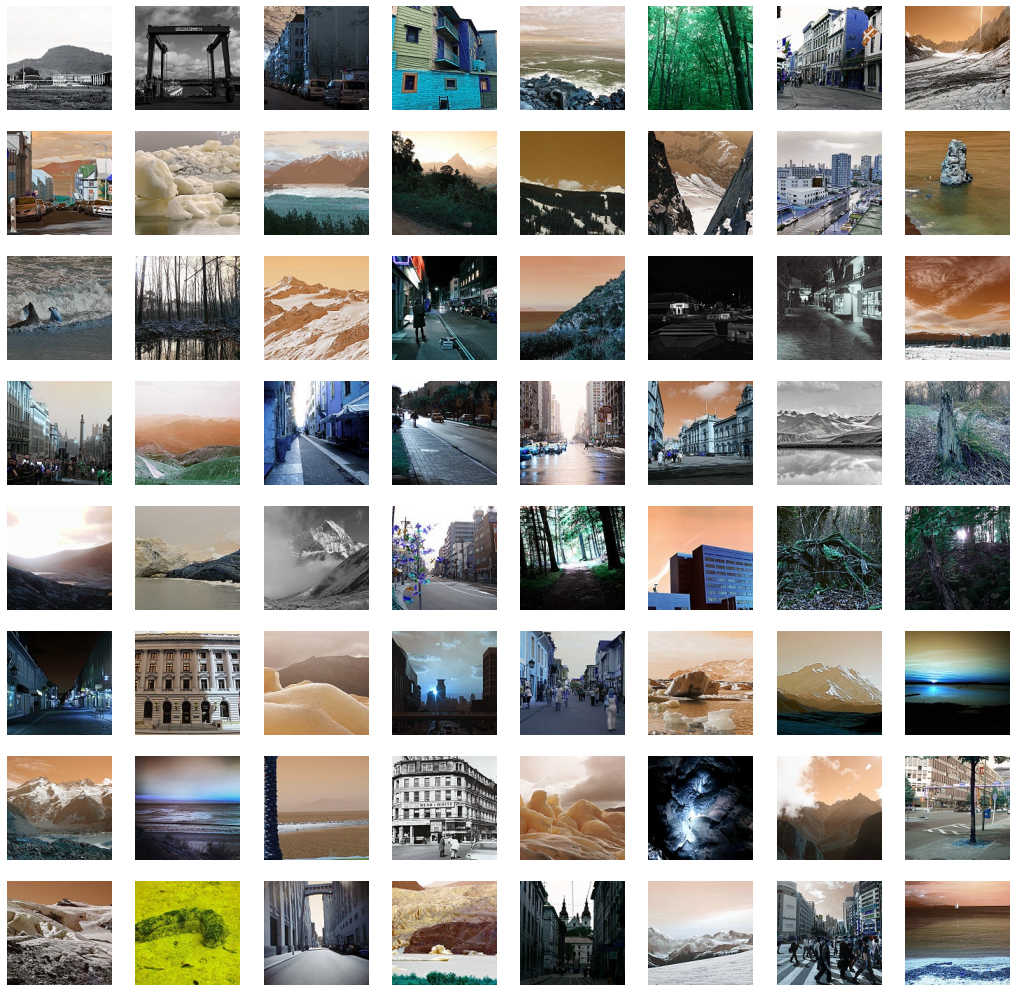

In [9]:
fig, axs = plt.subplots(8,8, figsize=(18,18))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(X_train[i*8+j])
        axs[i,j].axis('off')
plt.show()

### Primer intento de red neuronal

Debemos ahora crear nuestra red neuronal, teniendo en cuenta que tenemos 6 clases a clasificiar sabemos perfectamente que nuestra neurona de salida tendra la función de activación 'softmax'

Las capas que son densas (Dense para keras) son aquellas que estan interconectadas con todas las de la siguiente capa
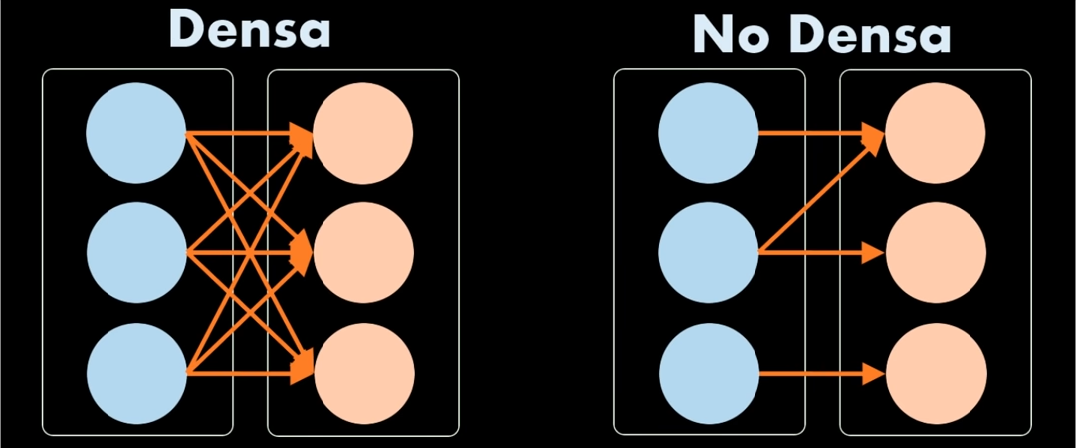

En las CNN principalmente se identifican por usar dos tipos nuevos de neuronas, las convolucionales y las de agrupación.

Las de convolución se dedican a hacer un DataAugmentation a la vez que se ejecuta el modelo, la capa se llama Conv2D y tiene los siguientes parametros:
- Cuantos nucleos queremos usar y después de que tamaño serán, la cantidad de nucleos nos da cada una, una imagen diferente, porque es una transformación sobre la imagen.
- input_shape= el tamaño de la imagen de entrada, el numero de canales que para blanco y negro son 1 , para RGB son 3

Las de agrupación se dedican a sacar digamos las caracteristicas más comúnes.

Aquí tengo un grafismo de lo que esto implica:
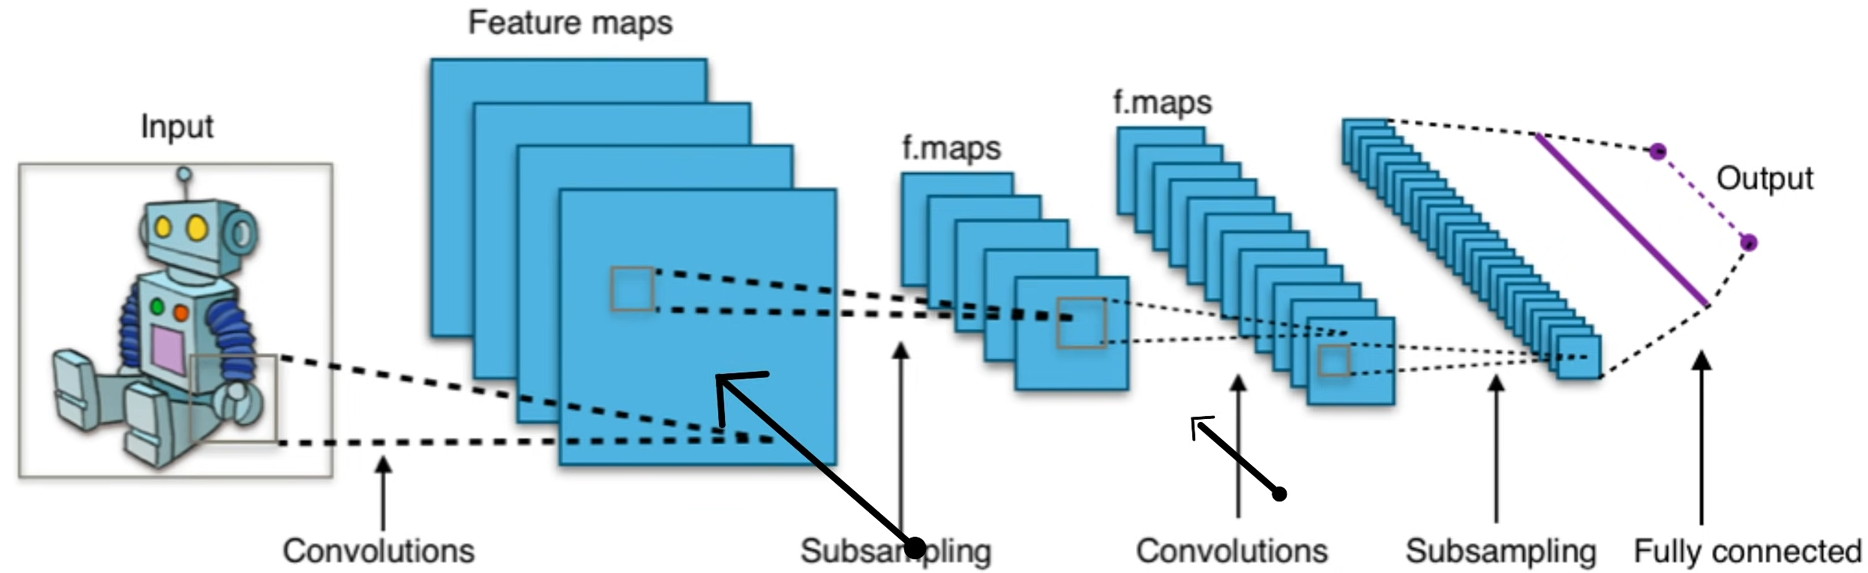
Cuanto más profunda sea tu CNN, más pequeñas serán las imagenes y más samples tendras.

In [10]:
def create_model():
    model = Sequential()
    #Estas son mis capas de CNN
    model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))) #Mi capa convolucional, en realidad son 96 convoluciones
    model.add(MaxPooling2D(pool_size=(2, 2))) #Capa de agrupación
    
    model.add(Flatten()) #Como vamos a usar ahora capas regulares, debemos aplanar la imagen para que las capas 
    #siguientes entiendan los datos
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

In [11]:
def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='loss (train)')
    ax1.plot(history.history['val_loss'], label='loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

Después de haber declarado nuestros dos métodos, tendremos que crear nuestro modelo, la parte más importante es el compile donde, declararemos el optimizer que en este caso es 'rmsprop' el cual realiza es 'Root Mean Square Propagation'.
Y la funcion de perdida.

Epoch 1/40
3/3 [==============================] - 10s 2s/step - loss: 10.4272 - accuracy: 0.1821 - val_loss: 6.8929 - val_accuracy: 0.2241
Epoch 2/40
3/3 [==============================] - 6s 2s/step - loss: 6.8033 - accuracy: 0.1751 - val_loss: 3.6726 - val_accuracy: 0.3065
Epoch 3/40
3/3 [==============================] - 6s 2s/step - loss: 2.8379 - accuracy: 0.2502 - val_loss: 1.1403 - val_accuracy: 0.3391
Epoch 4/40
3/3 [==============================] - 6s 2s/step - loss: 0.9505 - accuracy: 0.3423 - val_loss: 1.8124 - val_accuracy: 0.2471
Epoch 5/40
3/3 [==============================] - 6s 2s/step - loss: 1.1442 - accuracy: 0.3253 - val_loss: 0.6230 - val_accuracy: 0.3410
Epoch 6/40
3/3 [==============================] - 6s 2s/step - loss: 0.8144 - accuracy: 0.2835 - val_loss: 1.3996 - val_accuracy: 0.1897
Epoch 7/40
3/3 [==============================] - 6s 2s/step - loss: 1.0049 - accuracy: 0.2360 - val_loss: 0.4749 - val_accuracy: 0.3659
Epoch 8/40
3/3 [=======================

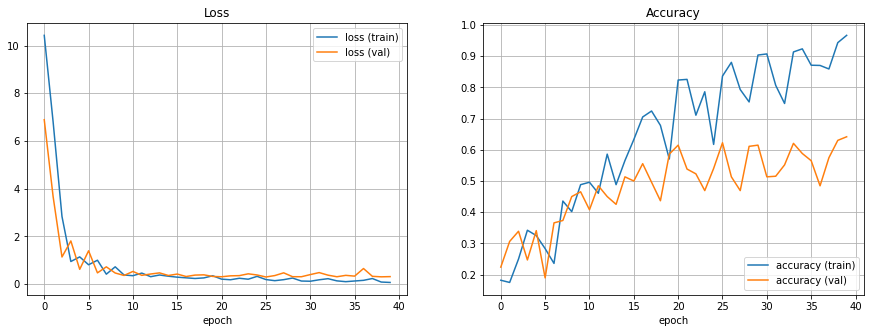

In [12]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history = model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        epochs=40, batch_size=512, verbose=1)
plot_train_val(history)

Obtenemos datos aunque con algo de overfitting a partir del epoc 10-15, más o menos razonables, pero esto se puede mejorar con un data augmentation. En caso de que no se vea la gráfica, revisa la carpeta correspondiente, se corresponde con la imagen Grafica 1, en este caso a partir del epoch 15 empieza a hacer overfitting.

### Segundo modelo neuronal con tecnicas para mejorar el resultado

Usamos el ImageDataGenerator para realizar DataAugmentation, he usado estos 4 parametros para que las imagenes sean muy distintas entre si y que pueda aprender mejor el modelo.

In [13]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    zoom_range=[0.5,1.5],
)
datagen.fit(X_train) #Añadimos el dataset original a las imagenes modificadas

In [14]:
#Creamos el de entrenamiento
datagen_train = datagen.flow(X_train, Y_train, batch_size=32)

A parte del DataAugmentation he añadido un 50% de Dropout para mejorar aún más el modelo.

In [15]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5)) #Tienen un 50% de que una neurona se apague aleatoriamente, para mejorar el entrenamiento
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

Epoch 1/60
45/45 [==============================] - 12s 257ms/step - loss: 0.9873 - accuracy: 0.3416 - val_loss: 0.3882 - val_accuracy: 0.4943
Epoch 2/60
45/45 [==============================] - 12s 255ms/step - loss: 0.3770 - accuracy: 0.4429 - val_loss: 0.3572 - val_accuracy: 0.5651
Epoch 3/60
45/45 [==============================] - 11s 251ms/step - loss: 0.3428 - accuracy: 0.5521 - val_loss: 0.3226 - val_accuracy: 0.5939
Epoch 4/60
45/45 [==============================] - 11s 251ms/step - loss: 0.3277 - accuracy: 0.5478 - val_loss: 0.3933 - val_accuracy: 0.5249
Epoch 5/60
45/45 [==============================] - 11s 249ms/step - loss: 0.3296 - accuracy: 0.5464 - val_loss: 0.3641 - val_accuracy: 0.5556
Epoch 6/60
45/45 [==============================] - 11s 250ms/step - loss: 0.3201 - accuracy: 0.5549 - val_loss: 0.3376 - val_accuracy: 0.5785
Epoch 7/60
45/45 [==============================] - 11s 254ms/step - loss: 0.3131 - accuracy: 0.5755 - val_loss: 0.3366 - val_accuracy: 0.6245

Epoch 58/60
45/45 [==============================] - 11s 249ms/step - loss: 0.2529 - accuracy: 0.6882 - val_loss: 0.3626 - val_accuracy: 0.7050
Epoch 59/60
45/45 [==============================] - 11s 251ms/step - loss: 0.2455 - accuracy: 0.6960 - val_loss: 0.4084 - val_accuracy: 0.6513
Epoch 60/60
45/45 [==============================] - 11s 250ms/step - loss: 0.2530 - accuracy: 0.6860 - val_loss: 0.4076 - val_accuracy: 0.6398


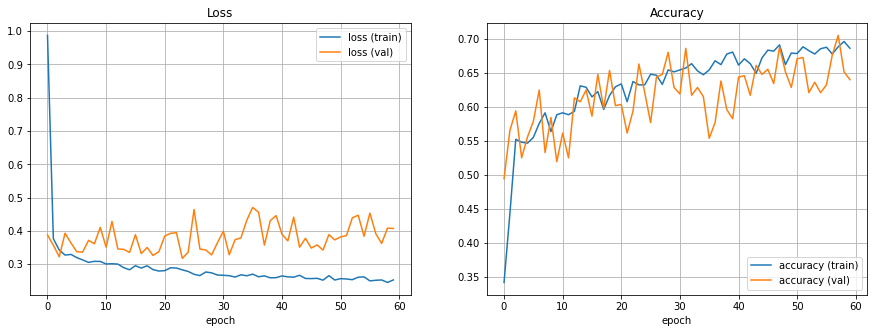

In [17]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history = model_cnn.fit(datagen_train, validation_data=(X_test, Y_test),
                        epochs=60, batch_size=512, verbose=1)
plot_train_val(history)

Hemos aumentado el accuracy hasta aprox el 68%, aunque por la curva parece ser que podría llegar a cotas más altas aumentando los epoch.
Se corresponde con la Grafica2.
